# Video Face Manipulation Detection Through Ensemble of CNNs
Image and Sound Processing Lab - Politecnico di Milano
- Nicolò Bonettini
- Edoardo Daniele Cannas
- Sara Mandelli
- Luca Bondi
- Paolo Bestagini


In [ ]:
!git clone https://github.com/polimi-ispl/icpr2020dfdc
!pip install efficientnet-pytorch
!pip install -U git+https://github.com/albu/albumentations > /dev/null
%cd icpr2020dfdc

Cloning into 'icpr2020dfdc'...
remote: Enumerating objects: 645, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 645 (delta 96), reused 80 (delta 80), pack-reused 537
Receiving objects: 100% (645/645), 99.63 MiB | 23.00 MiB/s, done.
Resolving deltas: 100% (336/336), done.
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=f68f04b16f6f33e6cf5b88dda0d46ac969a495ca7f3617f8509b30f1e2fd7679
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet-pytorch
  Running command git clone --filter=blob:none --quiet https://github.com/albu/albumentations /tmp/pip-req-build-s6cdt_ac
/content/icpr2020dfdc


In [ ]:
import torch
from torch.utils.model_zoo import load_url
from PIL import Image
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

from blazeface import FaceExtractor, BlazeFace
from architectures import fornet,weights
from isplutils import utils

## Parameters

In [ ]:
"""
Choose an architecture between
- EfficientNetB4
- EfficientNetB4ST
- EfficientNetAutoAttB4
- EfficientNetAutoAttB4ST
- Xception
"""
net_model = 'EfficientNetAutoAttB4'

"""
Choose a training dataset between
- DFDC
- FFPP
"""
train_db = 'DFDC'

In [ ]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
face_policy = 'scale'
face_size = 224

## Initialization

In [ ]:
model_url = weights.weight_url['{:s}_{:s}'.format(net_model,train_db)]
net = getattr(fornet,net_model)().eval().to(device)
net.load_state_dict(load_url(model_url,map_location=device,check_hash=True))

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b4-6ed6700e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b4-6ed6700e.pth
100%|██████████| 74.4M/74.4M [00:01<00:00, 49.1MB/s]


Loaded pretrained weights for efficientnet-b4


Downloading: "https://f002.backblazeb2.com/file/icpr2020/EfficientNetAutoAttB4_DFDC_bestval-72ed969b2a395fffe11a0d5bf0a635e7260ba2588c28683630d97ff7153389fc.pth" to /root/.cache/torch/hub/checkpoints/EfficientNetAutoAttB4_DFDC_bestval-72ed969b2a395fffe11a0d5bf0a635e7260ba2588c28683630d97ff7153389fc.pth
100%|██████████| 33.9M/33.9M [00:02<00:00, 13.2MB/s]


<All keys matched successfully>

In [ ]:
transf = utils.get_transformer(face_policy, face_size, net.get_normalizer(), train=False)

In [ ]:
facedet = BlazeFace().to(device)
facedet.load_weights("blazeface/blazeface.pth")
facedet.load_anchors("blazeface/anchors.npy")
face_extractor = FaceExtractor(facedet=facedet)

## Load images

In [ ]:
im_real = Image.open('notebook/samples/lynaeydofd_fr0.jpg')
im_fake = Image.open('notebook/samples/ajpzditips_mp4_fr000_subj0.jpg')

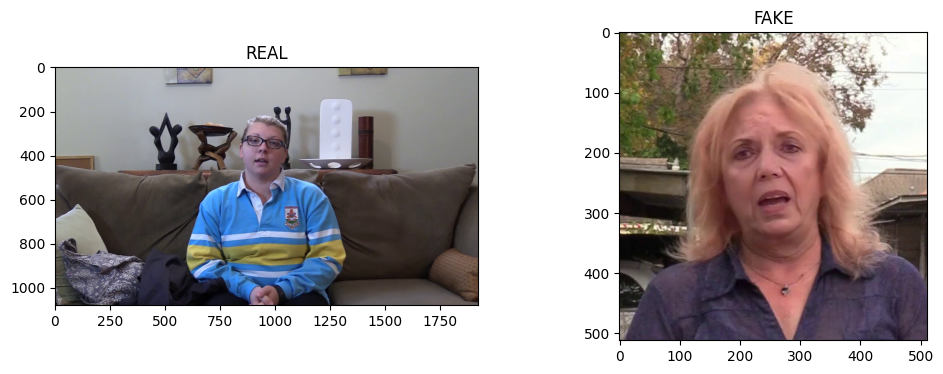

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].imshow(im_real)
ax[0].set_title('REAL')

ax[1].imshow(im_fake)
ax[1].set_title('FAKE');

## Extract faces

In [ ]:
im_real_faces = face_extractor.process_image(img=im_real)
im_fake_faces = face_extractor.process_image(img=im_fake)

In [ ]:
im_real_face = im_real_faces['faces'][0] # take the face with the highest confidence score found by BlazeFace
im_fake_face = im_fake_faces['faces'][0] # take the face with the highest confidence score found by BlazeFace

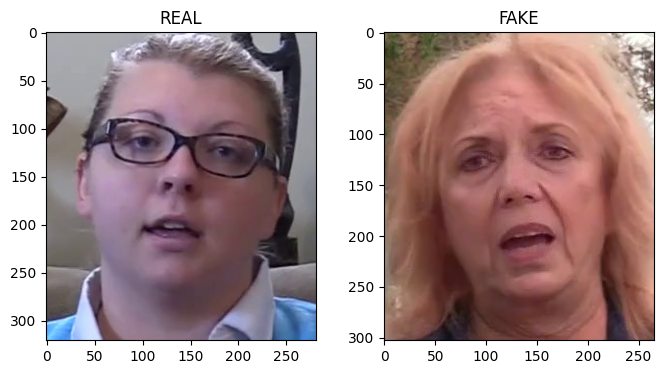

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].imshow(im_real_face)
ax[0].set_title('REAL')

ax[1].imshow(im_fake_face)
ax[1].set_title('FAKE');

## Predict scores

In [ ]:
faces_t = torch.stack( [ transf(image=im)['image'] for im in [im_real_face,im_fake_face] ] )

with torch.no_grad():
    faces_pred = torch.sigmoid(net(faces_t.to(device))).cpu().numpy().flatten()

In [ ]:
"""
Print scores.
A score close to 0 predicts REAL. A score close to 1 predicts FAKE.
"""
print('Score for REAL face: {:.4f}'.format(faces_pred[0]))
print('Score for FAKE face: {:.4f}'.format(faces_pred[1]))

Score for REAL face: 0.0115
Score for FAKE face: 0.6995


# APP VERSÃO 1 - IMAGENS

## Organizando o ambiente

In [1]:
# Instalando os pacotes necessários

# Flask-Ngrok é uma extensão que permite expor aplicativos Flask localmente
#usando o serviço Ngrok
!pip install flask-ngrok

# KivyMD é um framework que fornece uma interface
# de usuário atraente para aplicativos Kivy
!pip install kivymd

# Pyngrok é uma biblioteca Python para interagir com a API do Ngrok,
# facilitando a criação de túneis para serviços locais
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 37.6 MB/s eta 0:00:00
  Created wheel for kivymd: filename=kivymd-1.1.1-py3-none-any.whl size=2194076 sha256=7f090a684bbfc5108f974da2f9bce9429960bce32eeac09714cdd9b0939cddd0
  Stored in directory: /root/.cache/pip/wheels/12/d9/fa/2df584e3f57d3d9c57adf55edbe7791f7fa97522d1febe8ee0
Successfully built kivymd
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=f0b81dae7c7936c1b52966be6fadd920c279fb6ffbd6f9c51fe2d0f60222054d
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [10]:
# Clonar o repositório do projeto TCC
!git clone https://github.com/NathFarinha/TCC_DeepFake_Detection_v1.git

Cloning into 'TCC_DeepFake_Detection_v1'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 49 (delta 16), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (49/49), 30.77 MiB | 15.79 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [3]:
# Clonar o repositório do projeto do artigo 'Video Face Manipulation Detection Through Ensemble of CNNs'
!git clone https://github.com/polimi-ispl/icpr2020dfdc
!pip install efficientnet-pytorch
!pip install -U git+https://github.com/albu/albumentations > /dev/null
%cd icpr2020dfdc

Cloning into 'icpr2020dfdc'...
remote: Enumerating objects: 645, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 645 (delta 96), reused 80 (delta 80), pack-reused 537
Receiving objects: 100% (645/645), 99.63 MiB | 24.82 MiB/s, done.
Resolving deltas: 100% (336/336), done.
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=43d5443ebefc13e5cbc169b4f3e9590b0b40068e77e0cfb47c0427ff220da491
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet-pytorch
  Running command git clone --filter=blob:none --quiet https://github.com/albu/albumentations /tmp/pip-req-build-64pjj4sl
/content/icpr2020dfdc


In [4]:
# Importando módulos e bibliotecas necessários

import zipfile  # Módulo para trabalhar com arquivos ZIP
import shutil   # Módulo para operações de arquivo e diretório

import torch    # Biblioteca PyTorch, usada para aprendizado de máquina e processamento de tensores
from torch.utils.model_zoo import load_url  # Função para carregar modelos pré-treinados do PyTorch

import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos e visualização de dados
from scipy.special import expit  # Função sigmoide expit() da biblioteca SciPy

import sys  # Módulo sys para interagir com o sistema operacional
sys.path.append('..')  # Adicionando um diretório ao caminho de busca de módulos

# Importações personalizadas do projeto
from blazeface import FaceExtractor, BlazeFace, VideoReader  # Importações relacionadas a detecção facial
from architectures import fornet, weights  # Importações relacionadas à arquitetura de rede neural
from isplutils import utils  # Importações relacionadas a utilitários específicos

from pyngrok import ngrok  # Importação para interagir com o serviço Ngrok para criação de túneis


In [5]:
# Configurando a autenticação do Ngrok com um token específico
# Se necessário, crie uma conta no ngrok.com
# quando acessar o APP Flask e substitua o seu token aqui
ngrok.set_auth_token('2TZPAEd7EIxsEt8rtxmDcdGC47w_2gEH34ehrcxb1qf1eyPky')

In [6]:
# Extraindo o arquivo .zip especificado para o diretório de destino
with zipfile.ZipFile('/content/TCC_DeepFake_Detection_v1/project_APP_Flask_images_v2.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/icpr2020dfdc')


In [7]:
# Especifica a pasta de origem e a pasta de destino para as operações de movimentação
pasta_origem_static = '/content/icpr2020dfdc/project_APP_Flask_images_v2/static'
pasta_origem_templates = '/content/icpr2020dfdc/project_APP_Flask_images_v2/templates'
pasta_origem_app = '/content/icpr2020dfdc/project_APP_Flask_images_v2/app.py'
pasta_destino = '/content/icpr2020dfdc'

# Move as pastas de origem para a pasta de destino
shutil.move(pasta_origem_static, pasta_destino)
shutil.move(pasta_origem_templates, pasta_destino)
shutil.move(pasta_origem_app, pasta_destino)

# Remove a pasta principal e seu conteúdo
caminho_da_pasta = '/content/icpr2020dfdc/project_APP_Flask_images_v2'
shutil.rmtree(caminho_da_pasta)


In [8]:
# Imagens para teste rápido
# Extraindo o arquivo .zip especificado para o diretório de destino
with zipfile.ZipFile('/content/TCC_DeepFake_Detection_v1/samples/images.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

**PASSO A PASSO:**
1.   Clique no link * Running on http://NUMERO.ngrok-free.app
2.   Clique em 'Visit site'

3.   Escolha a imagem no seu computador ou da pasta 'samples_images'
4.   Escolha a rede que será usada para a detecção:
    - EfficientNetB4
    - EfficientNetB4ST
    - EfficientNetAutoAttB4
    - EfficientNetAutoAttB4ST

5.   Escolha o dataset que será usada para a detecção:
    - DFDC
    - FFPP

6.   Clique em 'Enviar'
7.   Espera alguns segundo e veja detecção
8.   Clique em 'INICIO' para detectar outra imagem
9.   Clique em 'INFO' para ver as informações do projeto

In [9]:
# Executando o APP Flask
# Clique no link * Running on http://NUMERO.ngrok-free.app
# e depois em 'Visit site'
!python /content/icpr2020dfdc/app.py

 * Serving Flask app 'app'
 * Debug mode: off
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Running on http://eea2-35-194-227-161.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040
127.0.0.1 - - [12/Sep/2023 17:29:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Sep/2023 17:29:04] "GET /static/main.css HTTP/1.1" 200 -
127.0.0.1 - - [12/Sep/2023 17:29:05] "GET /static/fundo-azul.jpg HTTP/1.1" 200 -
127.0.0.1 - - [12/Sep/2023 17:29:07] "GET /favicon.ico HTTP/1.1" 404 -
